In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/bioresponse.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


In [ ]:
data

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
features = data.drop('Activity', axis=1).to_numpy()
target = data['Activity'].to_numpy()

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, test_size=0.25, random_state=12345)

In [ ]:
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape, "\n\n\n")
print(features_train.T.shape)
print(target_train.T.shape)
print(features_test.T.shape)
print(target_test.T.shape)

(2813, 1776)
(2813,)
(938, 1776)
(938,) 



(1776, 2813)
(2813,)
(1776, 938)
(938,)


In [ ]:
def sigmoid(z):

    s = 1./(1.+np.exp(-z))
    
    return s

In [ ]:
def initialize_with_zeros(dim):

    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [ ]:
def propagate(w, b, X, Y):

    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [ ]:
def GD_optimizer(w, b, X, Y, num_iterations, learning_rate, print_cost = False):

    costs = []
    
    for i in range(num_iterations+1):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

In [ ]:
def model_GD(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = False):
  
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = GD_optimizer(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
model_GD_print = model_GD(features_train.T, target_train.reshape(1, len(target_train)), features_test.T, target_test.reshape(1, len(target_test)), print_cost = True)
model_GD_print

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.629627
Cost after iteration 200: 0.597491
Cost after iteration 300: 0.575582
Cost after iteration 400: 0.559153
Cost after iteration 500: 0.546123
Cost after iteration 600: 0.535413
Cost after iteration 700: 0.526390
Cost after iteration 800: 0.518647
Cost after iteration 900: 0.511907
Cost after iteration 1000: 0.505968
Cost after iteration 1100: 0.500682
Cost after iteration 1200: 0.495935
Cost after iteration 1300: 0.491641
Cost after iteration 1400: 0.487730
Cost after iteration 1500: 0.484146
Cost after iteration 1600: 0.480844
Cost after iteration 1700: 0.477788
Cost after iteration 1800: 0.474945
Cost after iteration 1900: 0.472292
Cost after iteration 2000: 0.469805
train accuracy: 78.99040170636331 %
test accuracy: 75.5863539445629 %


{'costs': [array([0.69314718]),
  array([0.62962723]),
  array([0.5974914]),
  array([0.57558232]),
  array([0.55915343]),
  array([0.5461229]),
  array([0.53541255]),
  array([0.52638964]),
  array([0.51864737]),
  array([0.51190679]),
  array([0.50596772]),
  array([0.50068163]),
  array([0.49593549]),
  array([0.49164149]),
  array([0.48773028]),
  array([0.48414627]),
  array([0.48084436]),
  array([0.47778757]),
  array([0.47494523]),
  array([0.47229172]),
  array([0.46980545])],
 'Y_prediction_test': array([[0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
         1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
         0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
         0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
         0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
         0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
         0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0

In [ ]:
def SGD_optimizer(w, b, X, Y, batch_size, num_iterations, learning_rate, print_cost = False):

    costs = []
    
    for i in range(num_iterations+1):

        id = np.random.randint(0, X.shape[1], batch_size)
        batch_X = X[:, id]
        batch_y = Y[:, id]    

        grads, cost = propagate(w,b,batch_X,batch_y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
def model_SGD(X_train, Y_train, X_test, Y_test, batch_size=100, num_iterations = 5000, learning_rate = 0.01, print_cost = False):
  
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = SGD_optimizer(w, b, X_train, Y_train, batch_size, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
model_SGD_print = model_SGD(features_train.T, target_train.reshape(1, len(target_train)), features_test.T, target_test.reshape(1, len(target_test)), print_cost=True)
model_SGD_print

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.609806
Cost after iteration 200: 0.586987
Cost after iteration 300: 0.585850
Cost after iteration 400: 0.566714
Cost after iteration 500: 0.536384
Cost after iteration 600: 0.510806
Cost after iteration 700: 0.464050
Cost after iteration 800: 0.481300
Cost after iteration 900: 0.541186
Cost after iteration 1000: 0.472328
Cost after iteration 1100: 0.541484
Cost after iteration 1200: 0.476913
Cost after iteration 1300: 0.515436
Cost after iteration 1400: 0.521352
Cost after iteration 1500: 0.477713
Cost after iteration 1600: 0.448996
Cost after iteration 1700: 0.470609
Cost after iteration 1800: 0.515542
Cost after iteration 1900: 0.472213
Cost after iteration 2000: 0.461646
Cost after iteration 2100: 0.457663
Cost after iteration 2200: 0.438642
Cost after iteration 2300: 0.493566
Cost after iteration 2400: 0.496314
Cost after iteration 2500: 0.444808
Cost after iteration 2600: 0.475984
Cost after iteration 2700: 0.417272
Cost

{'costs': [array([0.69314718]),
  array([0.60980559]),
  array([0.58698655]),
  array([0.58585039]),
  array([0.56671365]),
  array([0.53638393]),
  array([0.51080649]),
  array([0.46404995]),
  array([0.48130019]),
  array([0.54118593]),
  array([0.47232783]),
  array([0.541484]),
  array([0.47691338]),
  array([0.51543603]),
  array([0.5213522]),
  array([0.47771335]),
  array([0.44899625]),
  array([0.47060878]),
  array([0.51554222]),
  array([0.47221257]),
  array([0.46164552]),
  array([0.45766294]),
  array([0.43864213]),
  array([0.49356561]),
  array([0.49631393]),
  array([0.44480846]),
  array([0.47598372]),
  array([0.41727215]),
  array([0.44889191]),
  array([0.46772009]),
  array([0.45714736]),
  array([0.47269717]),
  array([0.43536289]),
  array([0.44482688]),
  array([0.48031902]),
  array([0.49961188]),
  array([0.44846568]),
  array([0.43834969]),
  array([0.51908344]),
  array([0.41552795]),
  array([0.49136865]),
  array([0.43795098]),
  array([0.4793645]),
  arra

In [ ]:
def Adam(w, b, X, Y, num_iterations, learning_rate, print_cost=False, betta_1=0.9, betta_2=0.999, e=10**(-8)):

    costs = []

    V_t_for_w = np.zeros(w.shape)
    S_t_for_w = np.zeros(w.shape)

    V_t_for_b = 0.
    S_t_for_b = 0.

    for i in range(1, num_iterations):
  
        grads, cost = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]
        
        V_t_for_w = betta_1*V_t_for_w + (1-betta_1)*dw
        S_t_for_w = betta_2*S_t_for_w + (1-betta_2)*np.power(dw, 2)
        w = w - learning_rate*(V_t_for_w/(1 - betta_1**i))/(np.sqrt(S_t_for_w/(1 - betta_2**i)) + e)

        V_t_for_b = betta_1*V_t_for_b + (1-betta_1)*db
        S_t_for_b = betta_2*S_t_for_b + (1-betta_2)*np.power(db, 2)

        b = b - learning_rate*(V_t_for_b/(1 - betta_1**i))/(np.sqrt(S_t_for_b/(1 - betta_2**i)) + e)
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if i % 100 == 0 and print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
def model_Adam(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.001, print_cost=False):
  
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = Adam(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
model_Adam_print = model_Adam(features_train.T, target_train.reshape(1, len(target_train)), features_test.T, target_test.reshape(1, len(target_test)), num_iterations = 2000, learning_rate = 0.001, print_cost=True)
model_Adam_print

Cost after iteration 100: 0.500970
Cost after iteration 200: 0.442439
Cost after iteration 300: 0.408778
Cost after iteration 400: 0.385263
Cost after iteration 500: 0.367266
Cost after iteration 600: 0.352758
Cost after iteration 700: 0.340655
Cost after iteration 800: 0.330300
Cost after iteration 900: 0.321264
Cost after iteration 1000: 0.313254
Cost after iteration 1100: 0.306058
Cost after iteration 1200: 0.299523
Cost after iteration 1300: 0.293533
Cost after iteration 1400: 0.288001
Cost after iteration 1500: 0.282856
Cost after iteration 1600: 0.278043
Cost after iteration 1700: 0.273519
Cost after iteration 1800: 0.269245
Cost after iteration 1900: 0.265193
train accuracy: 90.22396018485603 %
test accuracy: 75.15991471215352 %


{'costs': [array([0.50096999]),
  array([0.44243925]),
  array([0.40877813]),
  array([0.38526345]),
  array([0.36726586]),
  array([0.35275783]),
  array([0.34065462]),
  array([0.33029974]),
  array([0.32126425]),
  array([0.31325351]),
  array([0.30605761]),
  array([0.29952271]),
  array([0.2935333]),
  array([0.28800075]),
  array([0.28285578]),
  array([0.27804324]),
  array([0.27351859]),
  array([0.26924535]),
  array([0.26519336])],
 'Y_prediction_test': array([[0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
         1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
         0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
         0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
         0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
         0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
         0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
         1., 1., 0., 0


GD, learning rate = 1e-07:

train accuracy: 53.85709207252044 %
test accuracy: 55.330490405117274 %

GD, learning rate = 1e-06:

train accuracy: 53.85709207252044 %
test accuracy: 55.330490405117274 %

GD, learning rate = 1e-05:

train accuracy: 53.85709207252044 %
test accuracy: 55.330490405117274 %

GD, learning rate = 0.0001:

train accuracy: 57.02097404905794 %
test accuracy: 58.84861407249467 %

GD, learning rate = 0.001:

train accuracy: 71.6672591539282 %
test accuracy: 70.36247334754798 %

GD, learning rate = 0.01:

train accuracy: 78.99040170636331 %
test accuracy: 75.5863539445629 %

GD, learning rate = 0.1:

train accuracy: 83.93174546747245 %
test accuracy: 76.75906183368869 %


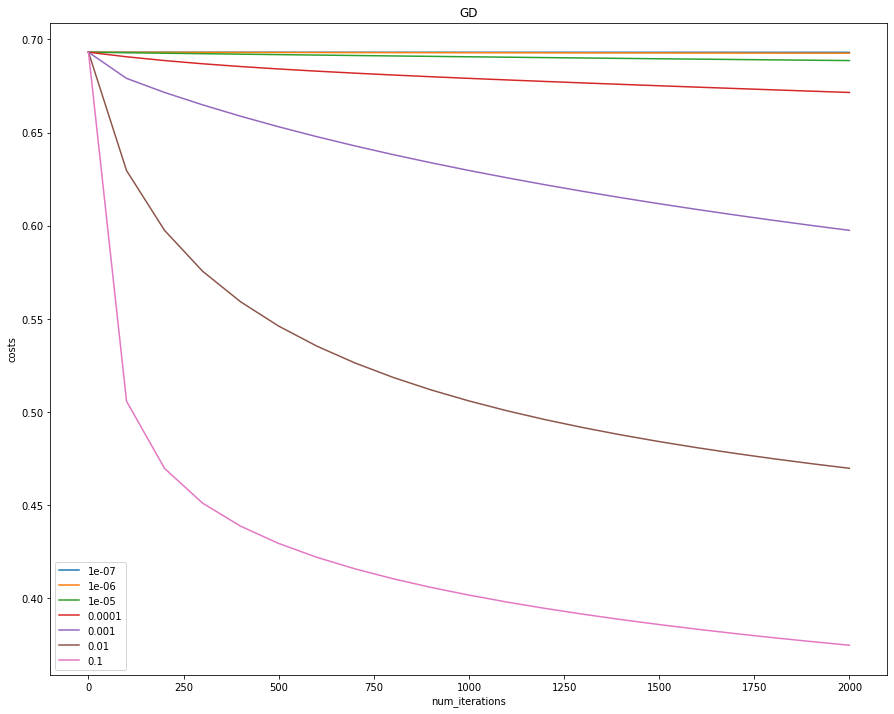


SGD, learning rate = 1e-07:

train accuracy: 53.85709207252044 %
test accuracy: 55.330490405117274 %

SGD, learning rate = 1e-06:

train accuracy: 53.85709207252044 %
test accuracy: 55.330490405117274 %

SGD, learning rate = 1e-05:

train accuracy: 53.85709207252044 %
test accuracy: 55.330490405117274 %

SGD, learning rate = 0.0001:

train accuracy: 56.94987557767508 %
test accuracy: 58.74200426439232 %

SGD, learning rate = 0.001:

train accuracy: 71.41841450408816 %
test accuracy: 70.04264392324095 %

SGD, learning rate = 0.01:

train accuracy: 79.02595094205475 %
test accuracy: 74.4136460554371 %

SGD, learning rate = 0.1:

train accuracy: 82.75862068965517 %
test accuracy: 76.86567164179104 %


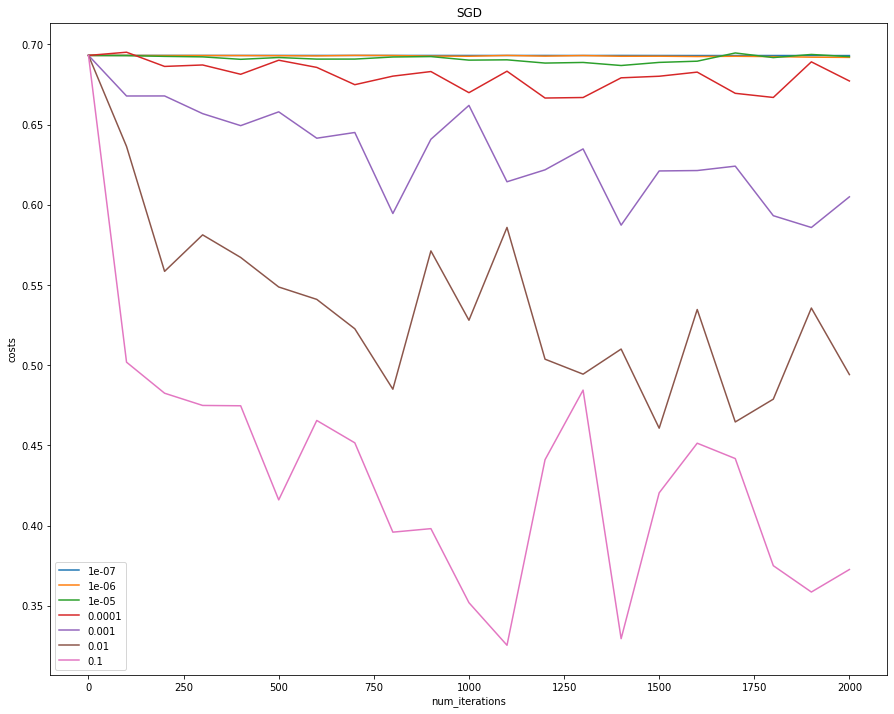


Adam, learning rate = 1e-07:

train accuracy: 53.85709207252044 %
test accuracy: 55.330490405117274 %

Adam, learning rate = 1e-06:

train accuracy: 55.52790615001778 %
test accuracy: 57.142857142857146 %

Adam, learning rate = 1e-05:

train accuracy: 70.4941343761109 %
test accuracy: 68.23027718550107 %

Adam, learning rate = 0.0001:

train accuracy: 81.54994667614646 %
test accuracy: 75.3731343283582 %

Adam, learning rate = 0.001:

train accuracy: 90.22396018485603 %
test accuracy: 75.15991471215352 %

Adam, learning rate = 0.01:



<ipython-input-11-f61e19dfbde5>:8: RuntimeWarning: divide by zero encountered in log
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
<ipython-input-11-f61e19dfbde5>:8: RuntimeWarning: invalid value encountered in multiply
  cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost


train accuracy: 94.13437611091362 %
test accuracy: 73.02771855010661 %

Adam, learning rate = 0.1:

train accuracy: 96.12513330963384 %
test accuracy: 71.32196162046908 %


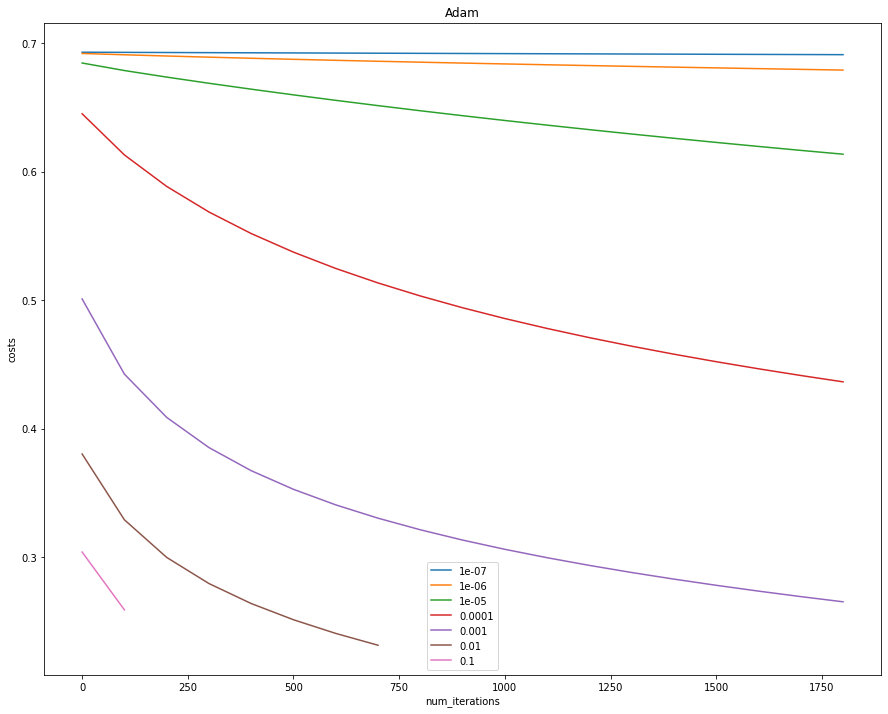

In [ ]:
models = (model_GD, model_SGD, model_Adam)
optimizers = ['GD', 'SGD', 'Adam']
num_iterations = 2000
learning_rates = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
for i in range(len(optimizers)):  
  costs = []
  for j in learning_rates:
    print(f"\n{optimizers[i]}, learning rate = {j}:\n")
    model = models[i](features_train.T, target_train.reshape(1, len(target_train)), features_test.T, target_test.reshape(1, len(target_test)), num_iterations = num_iterations, learning_rate = j)
    costs.append(model['costs'])
  plt.figure(figsize=(15,12))
  for k in range(len(costs)):
    plt.plot(np.arange(0, len(costs[k]))*100, costs[k], label=learning_rates[k])
  plt.xlabel('num_iterations')
  plt.ylabel('costs')
  plt.title(optimizers[i])
  plt.legend()
  plt.show()

Based on the results obtained, we can conclude that there is no point in making the learning rate too small (<1е-4), especially for gradient descent and stochastic gradient descent. For them, the most optimal learning rate is 0.01-0.1. For Adam, values above 0.01 are critical. The optimal range is (0.0001, 0.001). It may also be worth increasing the number of iterations to achieve a better result. In addition, it is worth noting that the graph of stochastic gradient descent reflects its meaning and difference from gradient descent and Adam, the graph shows how the function is optimized "stepwise" in this method.